# UCI Adult Data Set

In [1]:
import sys
print(sys.version)

import pandas as pd

from IPython.display import display

%pylab inline

3.6.7 |Anaconda custom (64-bit)| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Populating the interactive namespace from numpy and matplotlib


## 1. Exploration

In [2]:
from explore import basic_stats

data_df = pd.read_csv('../data/preprocessed/adult-data.csv', na_values='?')
print('Data read successfully!')

display(data_df.head())
display(list(data_df))

bias_col = 'sex'
target_col = 'ann_salary'
pos_target = '>50K'

bias_types = basic_stats(data_df, bias_col, target_col, pos_target)

Data read successfully!


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,ann_salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'country',
 'ann_salary']

Number of data points = 32561
Number of features = 14
Number of ann_salary >50K =  7841
Number of ann_salary <=50K =  24720
Number of sex Male = 21790
Number of sex Female = 10771


sex     ann_salary
Female  <=50K          9592
        >50K           1179
Male    <=50K         15128
        >50K           6662
Name: age, dtype: int64

Proportion Male with ann_salary >50K = 30.57%
Proportion Female with ann_salary >50K = 10.95%


## 2. Preparing the Data

### 2.1 Converting categorical columns to binary

There are several non-numeric columns that need to be converted. Many of them are can be reasonably converted into `1`/`0` (binary) values.

Other columns are categorical variables with more than two values. We create as many columns as possible values and assign a `1` to one of them and `0` to all others. We  use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function for this transformation.

### 2.2 Removing redundant data columns

Remove redundant data columns of our choice
- We note that preprocessing the non-numeric (categorical) data columns into binary data columns has resulted in a number of redundant data columns which are entirely dependent on other columns
- This means that 9 of the 107 columns can be deleted without any loss of data
- For the non-numeric binary columns we can remove any one of the two binary columns created
- For the multiclass columns, we remove the binary column which is least popular

In [3]:
from data import preprocess_data
from data import remove_redundant_cols

data_df, categories = preprocess_data(data_df)
remove_redundant_cols(data_df, categories, target_col, pos_target)

display(data_df.head())
display(list(data_df))

,age,workclass is Federal-gov,workclass is Local-gov,workclass is Private,workclass is Self-emp-inc,workclass is Self-emp-not-inc,workclass is State-gov,workclass is Without-pay,fnlwgt,education is 10th,...,country is Puerto-Rico,country is Scotland,country is South,country is Taiwan,country is Thailand,country is Trinadad&Tobago,country is United-States,country is Vietnam,country is Yugoslavia,ann_salary is >50K
0,39,0,0,0,0,0,1,0,77516,0,...,0,0,0,0,0,0,1,0,0,0
1,50,0,0,0,0,1,0,0,83311,0,...,0,0,0,0,0,0,1,0,0,0
2,38,0,0,1,0,0,0,0,215646,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,0,1,0,0,0,0,234721,0,...,0,0,0,0,0,0,1,0,0,0
4,28,0,0,1,0,0,0,0,338409,0,...,0,0,0,0,0,0,0,0,0,0


['age',
 'workclass is Federal-gov',
 'workclass is Local-gov',
 'workclass is Private',
 'workclass is Self-emp-inc',
 'workclass is Self-emp-not-inc',
 'workclass is State-gov',
 'workclass is Without-pay',
 'fnlwgt',
 'education is 10th',
 'education is 11th',
 'education is 12th',
 'education is 1st-4th',
 'education is 5th-6th',
 'education is 7th-8th',
 'education is 9th',
 'education is Assoc-acdm',
 'education is Assoc-voc',
 'education is Bachelors',
 'education is Doctorate',
 'education is HS-grad',
 'education is Masters',
 'education is Prof-school',
 'education is Some-college',
 'education_num',
 'marital_status is Divorced',
 'marital_status is Married-civ-spouse',
 'marital_status is Married-spouse-absent',
 'marital_status is Never-married',
 'marital_status is Separated',
 'marital_status is Widowed',
 'occupation is Adm-clerical',
 'occupation is Craft-repair',
 'occupation is Exec-managerial',
 'occupation is Farming-fishing',
 'occupation is Handlers-cleaners',
 '

### 2.3 Post-processing exploration

sex is Male                             1.000000
relationship is Husband                 0.580135
marital_status is Married-civ-spouse    0.431805
relationship is Unmarried              -0.321273
relationship is Wife                   -0.319311
occupation is Adm-clerical             -0.263148
hours_per_week                          0.229309
marital_status is Divorced             -0.228621
occupation is Craft-repair              0.223128
ann_salary is >50K                      0.215980
Name: sex is Male, dtype: float64

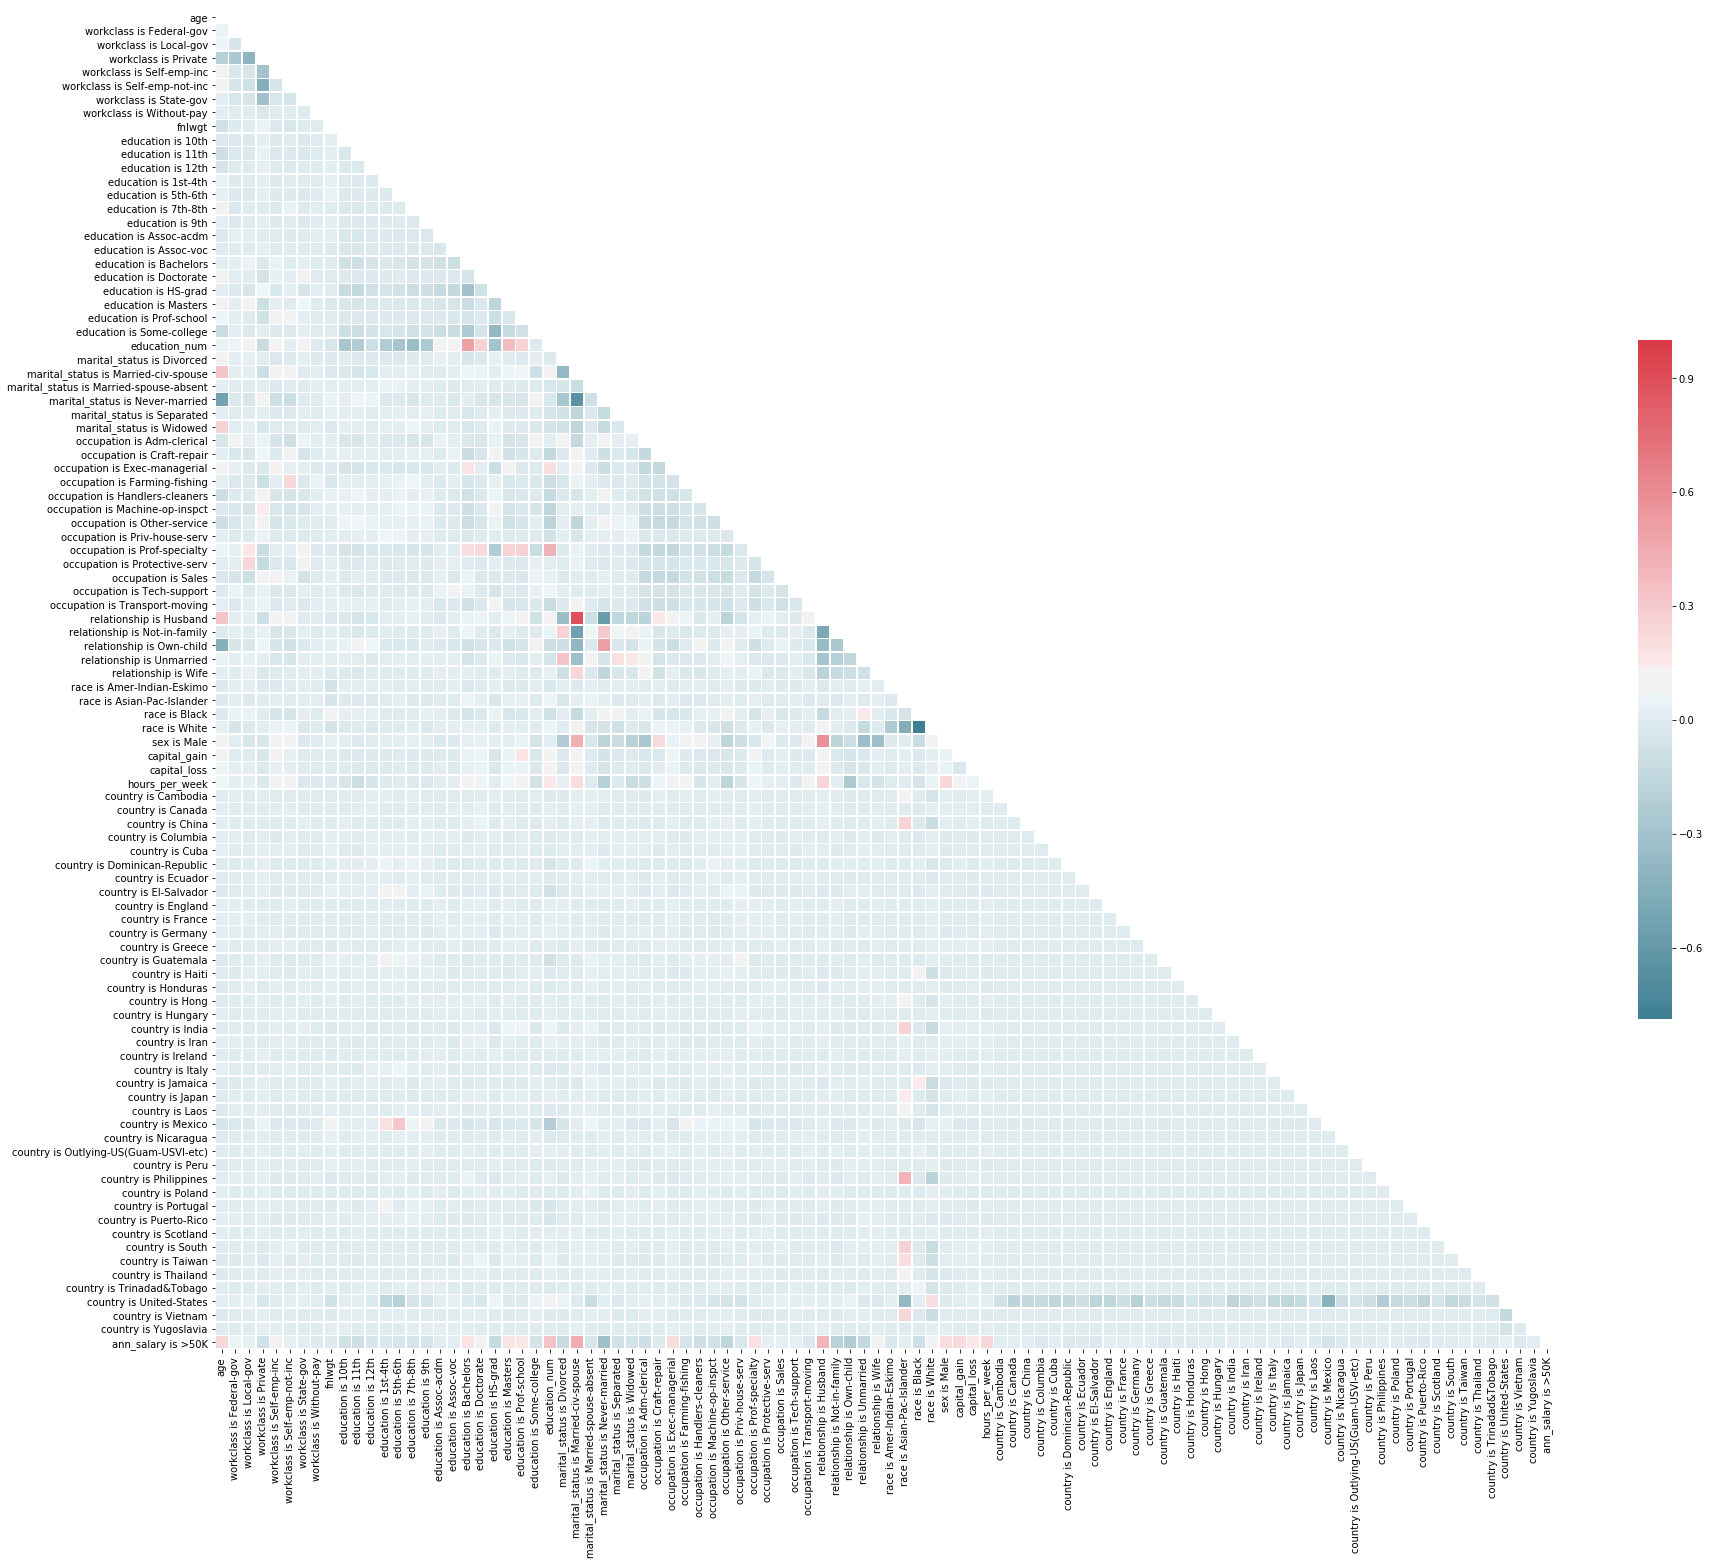

In [4]:
from explore import top_n_correlated_features
from plots import correlation_heatmap

bias_name = bias_col
bias_col = categories[bias_col][0]
target_col = categories[target_col][0]

display(top_n_correlated_features(data_df, bias_col, 10))
correlation_heatmap(data_df)

### 2.4 Separate features and labels

In [5]:
# Extract feature (X) and target (y) columns

feature_cols = list(data_df.columns)
feature_cols.remove(target_col) # leave bias_col in features

print("Number feature columns: ", len(feature_cols))
print("Target column: ",target_col)
print("Bias column: ",bias_col)

X_all = data_df[feature_cols]
y_all = data_df[target_col]
z_all = data_df[bias_col]

Number feature columns:  97
Target column:  ann_salary is >50K
Bias column:  sex is Male


### 2.5 Splitting data into training and test sets

In [6]:
from train_test import make_training_and_test_sets
from train_test import normalise
from oversample import oversample

# Splitting the original dataset into training and testing parts
n_train = 30000
X_train, X_train2, X_train1, X_test, y_train, y_train2, y_train1, y_test, z_train, z_test = make_training_and_test_sets(X_all, y_all, z_all, n_train)
X_train, X_train2, X_train1, X_test = normalise(X_train,  X_train2,  X_train1,  X_test)

print("Training set: {} samples".format(X_train.shape[0]))
print("Test set: {} samples".format(X_test.shape[0]))

# Oversampling to address bias in the training dataset
X_new, y_new, z_new = oversample(X_train, y_train, z_train, target_col, bias_col, bias_types)

# Work out how many data point we need to train from our augmented dataset ()
new_n_train = X_new.shape[0]*n_train/X_all.shape[0]
new_n_train = int(new_n_train - new_n_train%3)

X_train_new, X_train2_new, X_train1_new, X_test_new, y_train_new, y_train2_new, y_train1_new, y_test_new, z_train_new, z_test_new = make_training_and_test_sets(X_new, y_new, z_new, new_n_train)

print("Training set: {} samples".format(X_train_new.shape[0]))
print("Test set: {} samples".format(X_test_new.shape[0]))

Training set: 30000 samples
Test set: 2561 samples
Proportion of sex is Male=False for which ann_salary is >50K:  10.89%
Proportion of sex is Male=True for which ann_salary is >50K:  30.62%
Should have  33045.0  data points: 33045
Training set: 30444 samples
Test set: 2601 samples


## 3 Training a 3 layer neural network...

### 3.1 On all the data

Using TensorFlow backend.


,10000,20000,30000
Training time,23.321263,38.751346,59.522741
Prediction time,0.041740,0.066078,0.043625
F1 score (train),0.695817,0.723957,0.715469
F1 score (test),0.655204,0.684932,0.675325
Precision (train),0.807460,0.785004,0.793458
Precision (test),0.741803,0.725953,0.724907
Recall (train),0.611296,0.671719,0.651440
Recall (test),0.586710,0.648298,0.632091
Accuracy (train),0.871300,0.876650,0.875233
Accuracy (test),0.851230,0.856306,0.853573


/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


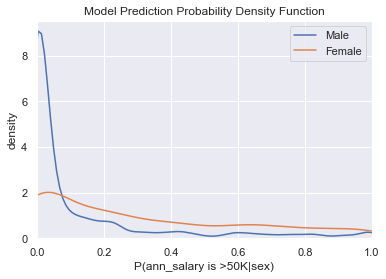

In [7]:
from train_test import make_results_df
from model import nn_classifier
from train_test import train_predict
from plots import probability_density_function

results_df = make_results_df(n_train)

# initialise NeuralNet Classifier
clf_nn = nn_classifier(n_features=X_train.shape[1])
print(clf_nn)

# Train on different size training sets and predict on a separate test set
y_pred = train_predict(clf_nn, X_train1, y_train1, X_test, y_test, results_df)
y_pred = train_predict(clf_nn, X_train2, y_train2, X_test, y_test, results_df)
y_pred = train_predict(clf_nn, X_train, y_train, X_test, y_test, results_df)

display(results_df)
probability_density_function(y_pred, z_test, target_col, bias_name, bias_types, 'all-data-dist')

### 3.2 With gender information removed

/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


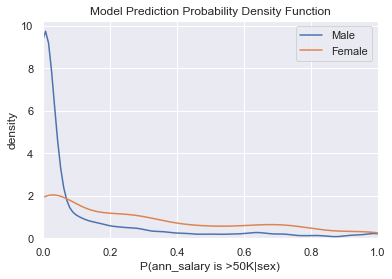

In [8]:
clf_nn = nn_classifier(n_features=X_train[X_train.columns.difference(['sex_Male'])].shape[1])
y_pred = train_predict(clf_nn, X_train[X_train.columns.difference(['sex_Male'])], y_train, X_test[X_test.columns.difference(['sex_Male'])], y_test, results_df)

probability_density_function(y_pred, z_test, target_col, bias_name, bias_types, 'no-sex-data-dist')

### 3.3 Training after upsampling well paid women

,10148,20296,30444
Training time,22.447983,40.891906,61.278094
Prediction time,0.043711,0.045558,0.045948
F1 score (train),0.778916,0.777825,0.779584
F1 score (test),0.709429,0.703209,0.718085
Precision (train),0.813320,0.838651,0.843231
Precision (test),0.736352,0.764535,0.775862
Recall (train),0.747305,0.725226,0.724871
Recall (test),0.684406,0.650990,0.668317
Accuracy (train),0.868151,0.871255,0.872619
Accuracy (test),0.825836,0.829296,0.836986


/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


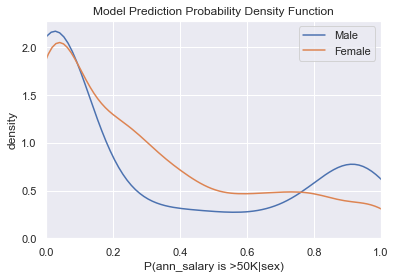

In [9]:
results_df = make_results_df(new_n_train)

# initialise NeuralNet Classifier
clf_nn = nn_classifier(n_features=X_train_new.shape[1])
print(clf_nn)

# Train on different size training sets and predict on a separate test set
y_pred = train_predict(clf_nn, X_train1_new, y_train1_new, X_test_new, y_test_new, results_df)
y_pred = train_predict(clf_nn, X_train2_new, y_train2_new, X_test_new, y_test_new, results_df)
y_pred = train_predict(clf_nn, X_train_new, y_train_new, X_test_new, y_test_new, results_df)

display(results_df)
probability_density_function(y_pred, z_test_new, target_col, bias_name, bias_types, 'fair-data-dist')

,10148,20296,30444
Training time,22.538839,41.477642,61.508230
Prediction time,0.044291,0.043711,0.044876
F1 score (train),0.779689,0.781586,0.790518
F1 score (test),0.675388,0.691558,0.679739
Precision (train),0.823862,0.817883,0.815952
Precision (test),0.681518,0.692683,0.685338
Recall (train),0.740013,0.748375,0.766621
Recall (test),0.669368,0.690438,0.674230
Accuracy (train),0.870024,0.870024,0.873735
Accuracy (test),0.844982,0.851620,0.846935


/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


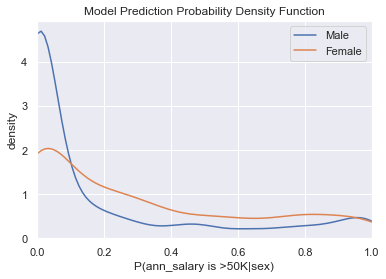

In [10]:
# initialise NeuralNet Classifier
clf_nn = nn_classifier(n_features=X_train_new.shape[1])
print(clf_nn)

# Train on different size training sets and predict on a separate test set
y_pred = train_predict(clf_nn, X_train1_new, y_train1_new, X_test, y_test, results_df)
y_pred = train_predict(clf_nn, X_train2_new, y_train2_new, X_test, y_test, results_df)
y_pred = train_predict(clf_nn, X_train_new, y_train_new, X_test, y_test, results_df)

display(results_df)
probability_density_function(y_pred, z_test, target_col, bias_name, bias_types, 'fair-algo-dist')